In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images =  train_images.astype('float32')/ 255
test_images =  test_images.astype('float32')/ 255
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)



In [6]:
train_images = train_images[0:10]
test_images = test_images[0:10]
train_labels = train_labels[0:10]
test_labels = test_labels[0:10]

In [7]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [8]:
datagen = ImageDataGenerator(rotation_range=45)

In [9]:
aug = datagen.flow(train_images, train_labels, batch_size= 10)


In [10]:
batch_0 = aug[0]
batch_0_images = aug[0][0]
batch_0_labels = aug[0][1]

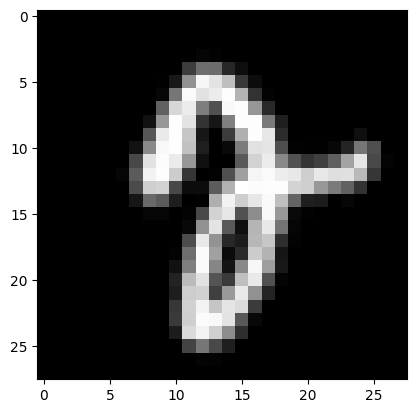

In [11]:
plt.imshow(aug[0][0][0], cmap='gray')

In [12]:
aug[0][1][0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

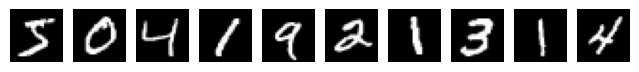

In [13]:
rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))
for i in range(1, 11):
  img = train_images[i-1]
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

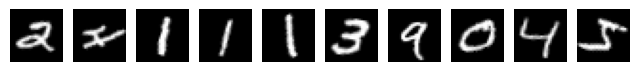

In [14]:
rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))
for i in range(1, 11):
  img = aug[0][0][i-1]
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

In [15]:
concatenated_train_images = np.concatenate((train_images, aug[0][0]), axis=0)
concatenated_train_lbl = np.concatenate((train_labels, aug[0][1]), axis=0)


In [16]:
concatenated_train_images.shape

(20, 28, 28, 1)

In [17]:
concatenated_train_lbl.shape

(20, 10)

In [18]:
from keras.models import Sequential
from keras import layers

In [19]:
model = Sequential()

#CNN
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#Classification
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=1 , epochs=5, batch_size=32)


Epoch 1/5
1/1 [==============================] - 11s 11s/step - loss: 2.4730 - accuracy: 0.0000e+00 - val_loss: 2.3073 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 97ms/step - loss: 1.8068 - accuracy: 0.3333 - val_loss: 2.2831 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 131ms/step - loss: 1.3885 - accuracy: 0.4444 - val_loss: 2.2454 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 102ms/step - loss: 1.0849 - accuracy: 0.8333 - val_loss: 2.2110 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 134ms/step - loss: 0.8497 - accuracy: 0.8889 - val_loss: 2.1722 - val_accuracy: 0.0000e+00


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
model.save('/content/drive/MyDrive/mnist_model/mnist_test_model.h5')

In [23]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/mnist_model/mnist_test_model.h5')

In [24]:
import cv2
im_gray_2 = cv2.imread('/content/drive/MyDrive/Test_MNIST/seven.png', cv2.IMREAD_GRAYSCALE)
im_gray_inverted= cv2.bitwise_not(im_gray_2)
im_gray_resized = cv2.resize(im_gray_inverted, (28, 28))
im_gray_flatten = im_gray_resized.reshape(1, 28, 28, 1)
im_gray_normalized = im_gray_flatten.astype('float32')/255
preds = loaded_model.predict(im_gray_normalized)
predicted_label = np.argmax(preds)
print(predicted_label)

1/1 [==============================] - 0s 284ms/step
9


In [25]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [26]:
for layer in loaded_model.layers:
  print(layer)

In [27]:
feature_extractor =  keras.models.Model(inputs=loaded_model.input, outputs=loaded_model.layers[-3].output)

In [28]:
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0     

In [32]:
model1 = Sequential()
model1.add(feature_extractor)
model1.add(layers.Conv2D(528, (1, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(10, activation='softmax'))

In [33]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 128)         92800     
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 528)         68112     
                                                                 
 flatten_2 (Flatten)         (None, 4752)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                47530     
                                                                 
Total params: 208,442
Trainable params: 208,378
Non-trainable params: 64
_________________________________________________________________


In [36]:
model1.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model1.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=2 , epochs=5, batch_size=1)


Epoch 1/5
18/18 - 3s - loss: 0.4952 - accuracy: 0.8333 - val_loss: 1.7614 - val_accuracy: 0.5000 - 3s/epoch - 144ms/step
Epoch 2/5
18/18 - 0s - loss: 0.1582 - accuracy: 1.0000 - val_loss: 1.5077 - val_accuracy: 1.0000 - 101ms/epoch - 6ms/step
Epoch 3/5
18/18 - 0s - loss: 0.0271 - accuracy: 1.0000 - val_loss: 1.2668 - val_accuracy: 1.0000 - 97ms/epoch - 5ms/step
Epoch 4/5
18/18 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.1460 - val_accuracy: 1.0000 - 98ms/epoch - 5ms/step
Epoch 5/5
18/18 - 0s - loss: 8.0149e-04 - accuracy: 1.0000 - val_loss: 1.0422 - val_accuracy: 1.0000 - 117ms/epoch - 6ms/step


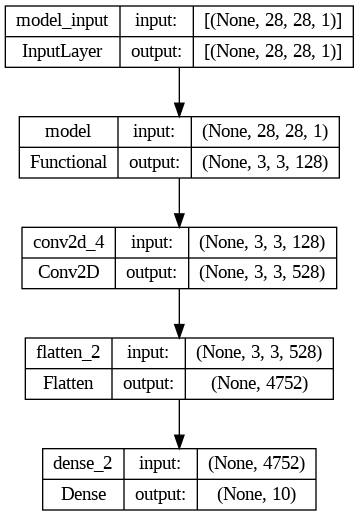

In [38]:
from keras.utils.vis_utils import plot_model
plot_model(model1, show_shapes=True)

In [39]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = loaded_model.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=1 , epochs=5, batch_size=32)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 1.3904 - accuracy: 0.6111 - val_loss: 2.0838 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 41ms/step - loss: 0.8309 - accuracy: 0.9444 - val_loss: 2.0017 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 37ms/step - loss: 0.5852 - accuracy: 0.9444 - val_loss: 1.9171 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 35ms/step - loss: 0.3974 - accuracy: 0.9444 - val_loss: 1.8502 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 36ms/step - loss: 0.2612 - accuracy: 1.0000 - val_loss: 1.7938 - val_accuracy: 1.0000


In [40]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [41]:
for layer in feature_extractor.layers:
  layer.trainable=False


#feature_extractor.trainable=False

In [42]:
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0     

In [46]:
model2 = Sequential()
model2.add(feature_extractor)
model2.add(layers.Conv2D(528, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='softmax'))

In [47]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 128)         92800     
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 528)         608784    
                                                                 
 flatten_4 (Flatten)         (None, 528)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5290      
                                                                 
Total params: 706,874
Trainable params: 614,074
Non-trainable params: 92,800
_________________________________________________________________


In [48]:
model2.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model2.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=2 , epochs=5, batch_size=1)


Epoch 1/5
18/18 - 1s - loss: 2.2996 - accuracy: 0.2222 - val_loss: 1.9578 - val_accuracy: 0.5000 - 1s/epoch - 76ms/step
Epoch 2/5
18/18 - 0s - loss: 1.4492 - accuracy: 0.5556 - val_loss: 1.5693 - val_accuracy: 0.5000 - 91ms/epoch - 5ms/step
Epoch 3/5
18/18 - 0s - loss: 0.9556 - accuracy: 0.9444 - val_loss: 1.3701 - val_accuracy: 0.5000 - 79ms/epoch - 4ms/step
Epoch 4/5
18/18 - 0s - loss: 0.6559 - accuracy: 0.9444 - val_loss: 0.6275 - val_accuracy: 1.0000 - 92ms/epoch - 5ms/step
Epoch 5/5
18/18 - 0s - loss: 0.4724 - accuracy: 1.0000 - val_loss: 0.5852 - val_accuracy: 1.0000 - 94ms/epoch - 5ms/step
